In [6]:
from utils import *
from analysis import *
import multiprocessing as mp
import pathlib
from tqdm.notebook import tqdm
import gc


fig_dir = pathlib.Path(".") / "figs"


# Probability Distributions

We expect distributions of the form 
$$
\begin{aligned}
    P(S = s) &= s^{1-\tau} \\
    P(T = t) &= s^{1-\alpha} \\
    P(R = r) &= s^{1-\lambda}
\end{aligned}
$$

# 2D Grid comparison
Compare on the 2D grid the different parameters of the systems.

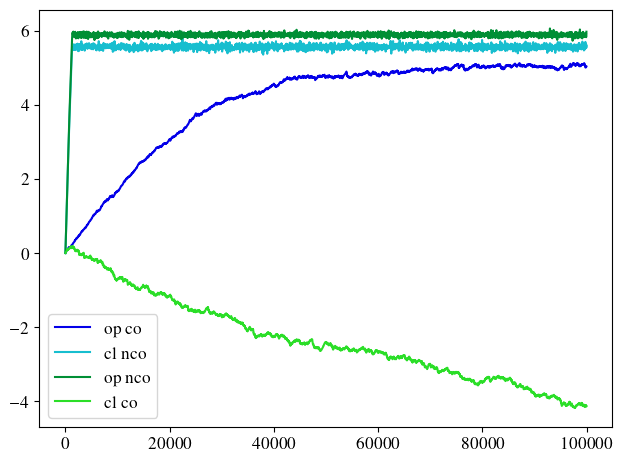

In [7]:
from pathlib import Path


data_dirs = Path().cwd().joinpath("data").glob("d2_g20*")

plt.figure("2d_bp_comparison")
for data_dir in data_dirs:
    # slope = np.load(data_dir/"data_0.slopes.npy")
    params = get_short_params(get_system_params_from_name(data_dir.name))
    b, p = params["boundary_condition"], params["perturbation"]
    step, slope = load_slope_values((data_dir / "data_0.slopes.npy"))
    draw_slope(slope, step, label=f"{b} {p}")

plt.legend()
plt.savefig(fig_dir / "2d_bp_comparison.png", bbox_inches="tight", dpi=300)


# Comparison of grid sizes

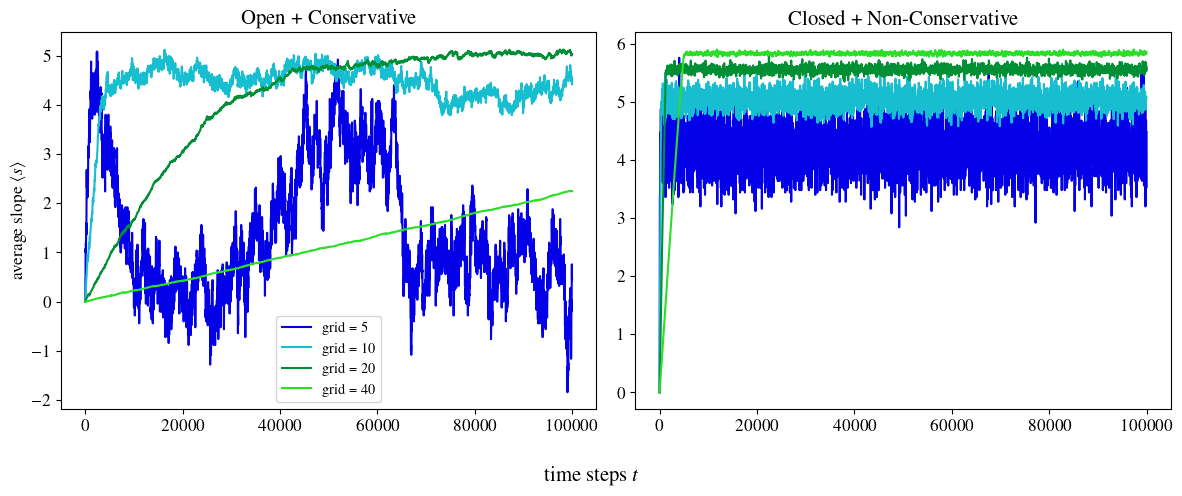

In [8]:
grid_sizes = [5, 10, 20, 40]

fig = plt.figure("2d_grid_comparison", figsize=(12, 5))
plt.subplot(121)
plt.ylabel(r"average slope $\langle s \rangle$")
plt.title("Open + Conservative")
plt.subplot(122)
plt.title("Closed + Non-Conservative")

for grid in grid_sizes:
    # open conservative
    data_dir = Path().cwd().joinpath(f"data/d2_g{grid}_c7_op_co/data_0.slopes.npy")
    step, slope = load_slope_values(data_dir.__str__())
    plt.subplot(121)
    draw_slope(slope, step, label=f"grid = {grid}")
    plt.legend(fontsize="small")

    # closed non conservative
    data_dir = Path().cwd().joinpath(f"data/d2_g{grid}_c7_cl_nco/data_0.slopes.npy")
    step, slope = load_slope_values(data_dir.__str__())
    plt.subplot(122)
    draw_slope(slope, step, label=f"grid = {grid}")
    # plt.legend(fontsize="small")

# plt.legend()
fig.supxlabel(r"time steps $t$")
plt.savefig(fig_dir / "2d_grid_comparison.pdf", bbox_inches="tight", dpi=300)
plt.savefig(fig_dir / "2d_grid_comparison.png", bbox_inches="tight", dpi=300)



# 2D comparison of scaling exponents


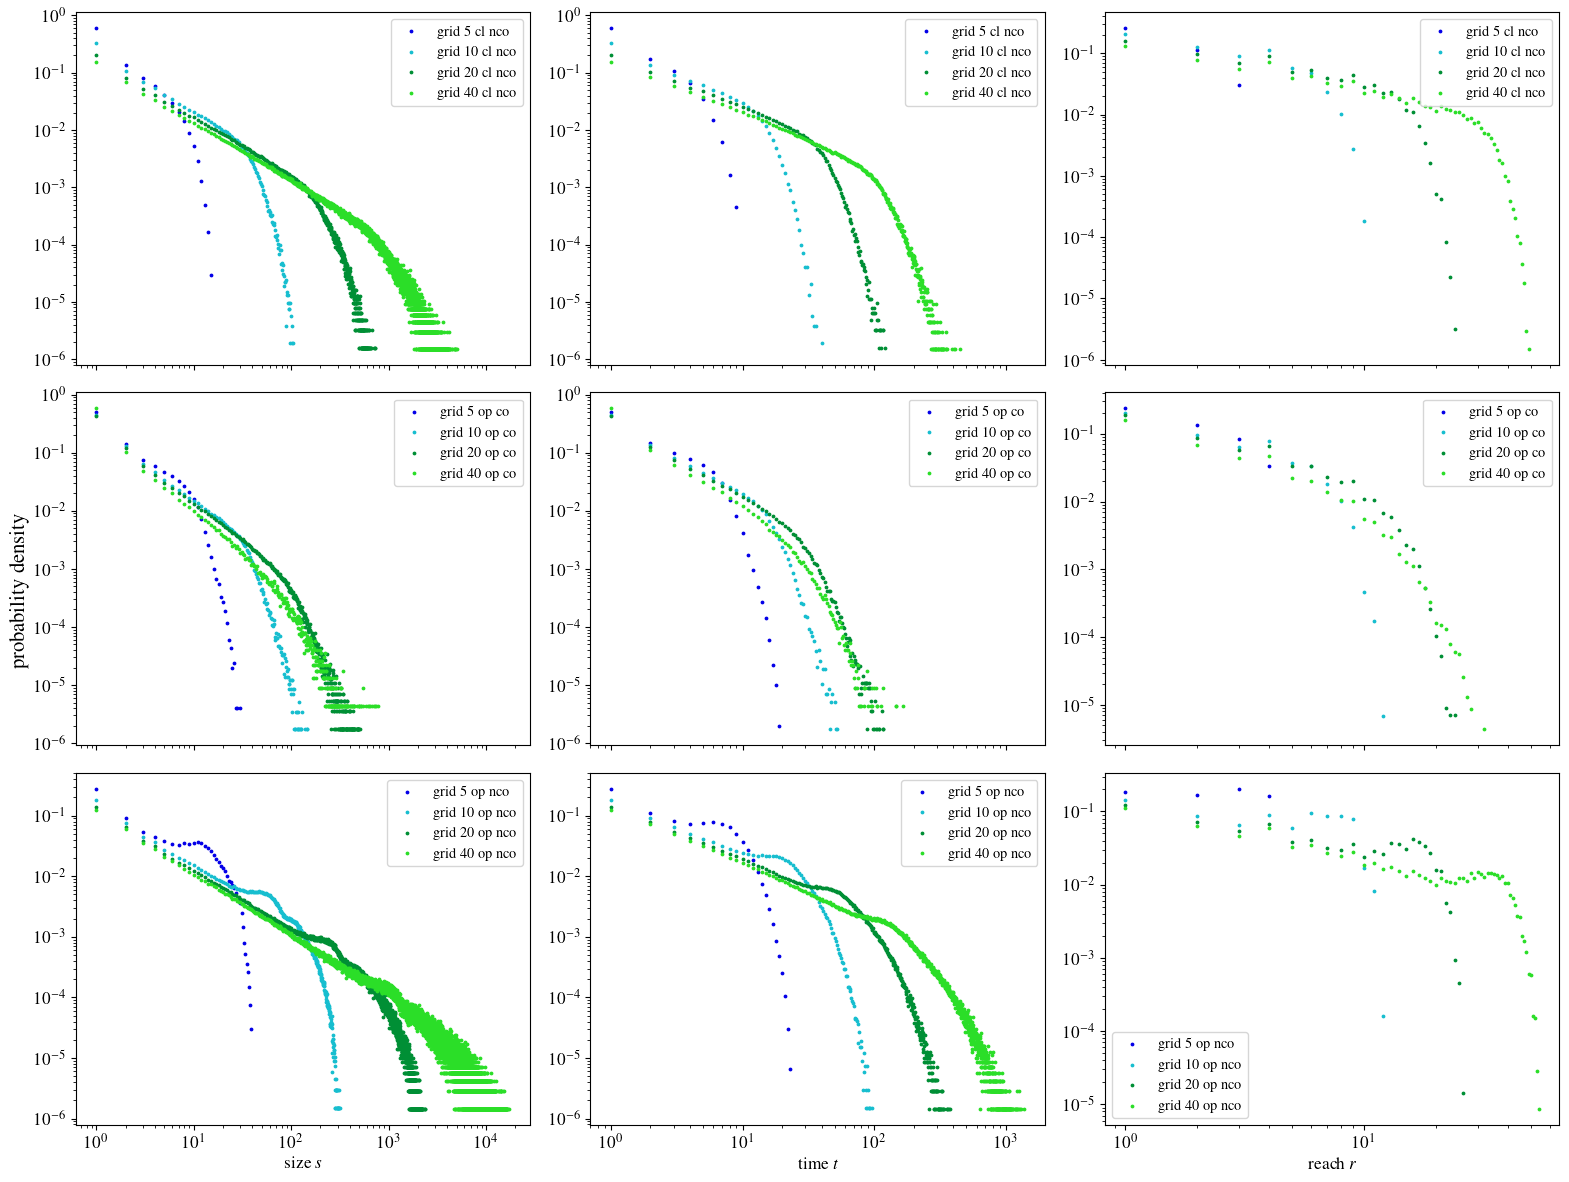

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(16, 12), sharex="col")

fig.supylabel("probability density")

# closed non conservative, different grid
for grid in grid_sizes:
    data_dir = Path().cwd().joinpath(f"data/d2_g{grid}_c7_cl_nco")
    df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False)

    for i, obs in enumerate("size time reach".split()):
        x, y = get_hist(df[obs])
        draw_distribution(x, y, axis=ax[0, i], label=f"grid {grid} cl nco")
        ax[0, i].legend(fontsize="small")

# open conservative, different grid
for grid in grid_sizes:
    data_dir = Path().cwd().joinpath(f"data/d2_g{grid}_c7_op_co")
    df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False)

    for i, obs in enumerate("size time reach".split()):
        x, y = get_hist(df[obs])
        draw_distribution(x, y, axis=ax[1, i], label=f"grid {grid} op co")
        ax[1, i].legend(fontsize="small")

# open conservative, different grid
for grid in grid_sizes:
    data_dir = Path().cwd().joinpath(f"data/d2_g{grid}_c7_op_nco")
    df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False)

    for i, obs in enumerate("size time reach".split()):
        x, y = get_hist(df[obs])
        draw_distribution(x, y, axis=ax[2, i], label=f"grid {grid} op nco")
        ax[2, i].legend(fontsize="small")
        ax[2, i].set_xlabel(f"{obs} ${obs[0]}$")
# 
plt.savefig(fig_dir / "comparison_grid_distributions.png", dpi=300)
plt.savefig(fig_dir / "comparison_grid_distributions.pdf", dpi=300)



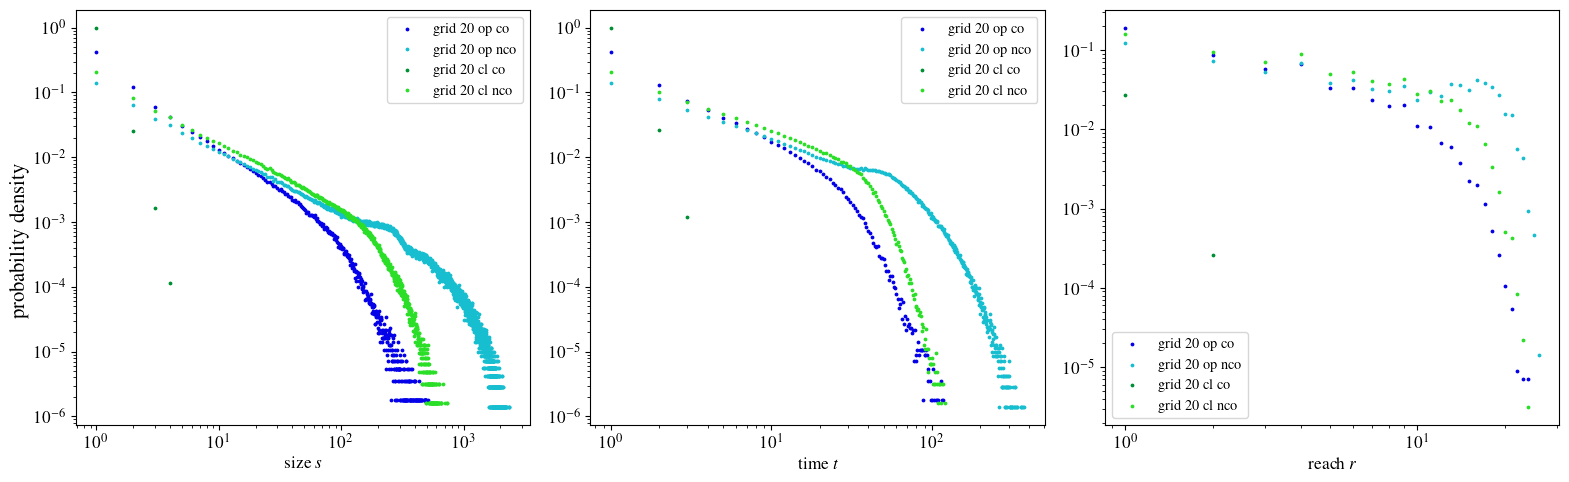

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
fig.supylabel("probability density")
# grid 20, different pb
for b, p in [("op", "co"), ("op", "nco"), ("cl", "co"), ("cl", "nco")]:
    data_dir = Path().cwd().joinpath(f"data/d2_g20_c7_{b}_{p}")
    df = load_combine_avalanche_data_samples(data_dir, with_dissipation=False)

    for i, obs in enumerate("size time reach".split()):
        x, y = get_hist(df[obs])
        # b, p = data_dir.name.split("_")[-2:]
        draw_distribution(x, y, axis=ax[i], label=f"grid {20} {b} {p}")
        ax[i].legend(fontsize="small")
        ax[i].set_xlabel(f"{obs} ${obs[0]}$")
        
fig.savefig(fig_dir/"comparison_pb_distributions.pdf", dpi=300)
fig.savefig(fig_dir/"comparison_pb_distributions.png", dpi=300)
